In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [236]:
#import data
df= pd.read_excel(r'/Users/jessiecai/Desktop/筆試題目/3-1.xls')
df.head()

,date,price,quote,volume,fi_over,fi_per,cr_over,se_over,finan_diff,lend_diff,over_1000
0,2020-08-07,148.5,-5.41,48472.0,-1869.0,30.2,-1511.0,-914.0,27.0,-322.0,48.29
1,2020-07-31,157.0,8.28,98040.0,1799.0,30.9,340.0,-703.0,-562.0,481.0,51.42
2,2020-07-24,145.0,3.94,53790.0,-471.0,30.1,533.0,-370.0,1389.0,294.0,50.65
3,2020-07-17,139.5,-1.06,44506.0,-243.0,30.2,21.8,-608.0,-297.0,598.0,51.59
4,2020-07-10,141.0,7.63,104124.0,-1471.0,30.4,50.0,594.0,-265.0,539.0,50.27


In [237]:
data=df.drop(['date'], axis=1)
data.index=df.date

In [238]:
# 缺失值處理
data[data.isnull().values==True] # 缺失值僅兩列，因此決定刪除這兩列

df_na= data.dropna(axis=0)
df1=df_na.reindex(index=df_na.index[::-1])
df1.tail()

,price,quote,volume,fi_over,fi_per,cr_over,se_over,finan_diff,lend_diff,over_1000
date,,,,,,,,,,
2020-07-10,141.0,7.63,104124.0,-1471.0,30.4,50.0,594.0,-265.0,539.0,50.27
2020-07-17,139.5,-1.06,44506.0,-243.0,30.2,21.8,-608.0,-297.0,598.0,51.59
2020-07-24,145.0,3.94,53790.0,-471.0,30.1,533.0,-370.0,1389.0,294.0,50.65
2020-07-31,157.0,8.28,98040.0,1799.0,30.9,340.0,-703.0,-562.0,481.0,51.42
2020-08-07,148.5,-5.41,48472.0,-1869.0,30.2,-1511.0,-914.0,27.0,-322.0,48.29


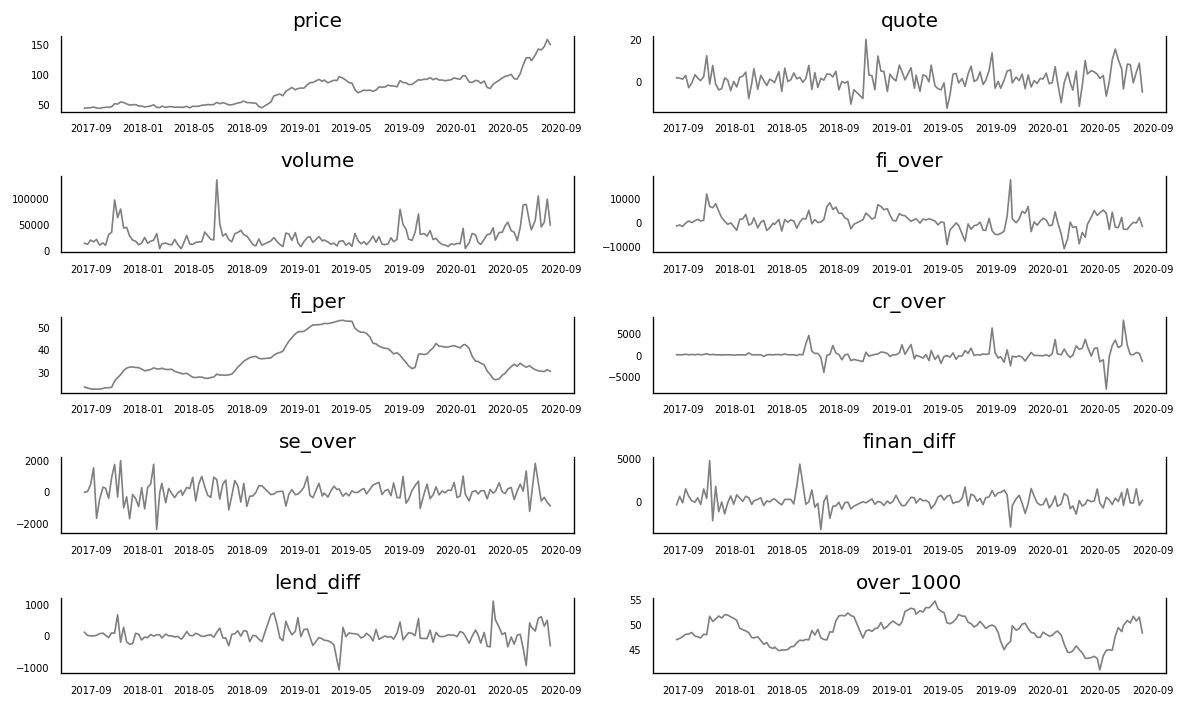

In [240]:
# Plot
fig, axes= plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data1=df1[df1.columns[i]]
    ax.plot(data1, color='grey', linewidth=1)
    ax.set_title(df1.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [241]:
# Granger's Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test= 'ssr_chi2test'
def granger_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df= pd.DataFrame(np.zeros((len(variables), len(variables))), columns= variables, index= variables)
    for c in df.columns:
        for r in df.index:
            test_result= grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values= [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            if verbose: print(f'Y={r}, X={c}, P Value={p_values}')
            min_p_value=np.min(p_values)
            df.loc[r, c]=min_p_value
    df.columns= [var+'_x' for var in variables]
    df.index= [var+'_y' for var in variables]
    return df

gcm=granger_causation_matrix(df1, variables= df1.columns)
gcm

,price_x,quote_x,volume_x,fi_over_x,fi_per_x,cr_over_x,se_over_x,finan_diff_x,lend_diff_x,over_1000_x
price_y,1.0000,0.0958,0.5479,0.5068,0.0554,0.0065,0.1907,0.1607,0.0042,0.0069
quote_y,0.0071,1.0000,0.4336,0.5178,0.1506,0.1581,0.1127,0.0982,0.0745,0.0077
volume_y,0.0629,0.1255,1.0000,0.3993,0.0159,0.0000,0.0073,0.0023,0.5172,0.0014
fi_over_y,0.0292,0.4342,0.4197,1.0000,0.0334,0.0016,0.2895,0.0133,0.0852,0.1093
fi_per_y,0.0796,0.0351,0.3795,0.0000,1.0000,0.0022,0.1587,0.0669,0.0538,0.4038
cr_over_y,0.1243,0.2864,0.0629,0.1519,0.1007,1.0000,0.6383,0.4713,0.0547,0.0183
se_over_y,0.4202,0.2259,0.1071,0.0193,0.0868,0.0006,1.0000,0.0010,0.0229,0.0704
finan_diff_y,0.5993,0.0927,0.0005,0.0148,0.0177,0.5215,0.0179,1.0000,0.2132,0.3462
lend_diff_y,0.0090,0.0003,0.1789,0.0046,0.0035,0.0014,0.0175,0.3412,1.0000,0.0179
over_1000_y,0.0014,0.0000,0.0011,0.0000,0.0000,0.0299,0.0336,0.0372,0.7898,1.0000


In [253]:
# Cointergration Test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointergration_test(df, alpha=0.05):
    out= coint_johansen(df, -1, 5)
    d= {'0.90':0, '0.95':1, '0.99':2}
    traces= out.lr1
    cvts= out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length=6): return str(val).ljust(length)
    
    print('Name :: Test Stat >  C(95%)  =>  Signif')
    for col, trace, cvt in zip(df1.columns, traces, cvts):
        print(adjust(col), '::', adjust(round(trace, 2), 9), ">", adjust(cvt, 8), '=>', trace>cvt)

cointergration_test(df1)

Name :: Test Stat >  C(95%)  =>  Signif
price  :: 313.57    > 219.4051 => True
quote  :: 248.57    > 179.5199 => True
volume :: 195.71    > 143.6691 => True
fi_over :: 148.39    > 111.7797 => True
fi_per :: 103.11    > 83.9383  => True
cr_over :: 66.86     > 60.0627  => True
se_over :: 36.48     > 40.1749  => False
finan_diff :: 14.73     > 24.2761  => False
lend_diff :: 6.79      > 12.3212  => False
over_1000 :: 0.62      > 4.1296   => False


In [243]:
nobs=20
df_train, df_test= df1[0:-20], df1[-nobs: ]
df_train.shape #(133, 12)
df_test.shape #(20, 12)

(20, 10)

In [244]:
# ADF Test
def adfuller_test(series, signif= 0.05, name='', verbose=False):
    r= adfuller(series, autolag='AIC')
    output= {'test_statistic': round(r[0], 4), 'pvalue': round(r[1], 4), 'n_lags': round(r[2],4), 'n_obs': r[3]}
    p_value= output['pvalue']
    def adjust(val, length=6): return str(val).ljust(length)
    
    print(f' Augmented Dickey-Fuller Test on "{name}"', "\n", "-"*47)
    print(f' Null Hypothesis: Data has until root. Non-Stationary. ')
    print(f' Significance Level   = {signif}')
    print(f' Test Statistic          = {output["test_statistic"]}')
    print(f' No. Lags Chosen     = {output["n_lags"]}')
          
    if p_value <= signif:
        print(f' => P-Value ={p_value}. Rejecting Null Hypothesis')
        print(f' => Series is Stationary')
    else:
        print(f' => P-Value={p_value}. Weak evidence to reject the Null Hypothesis')
        print(f' => Series is Non-Stationary.')

# ADF Test on each columns
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
          
#None of the time series is stationary

 Augmented Dickey-Fuller Test on "price" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -1.3347
 No. Lags Chosen     = 0
 => P-Value=0.6131. Weak evidence to reject the Null Hypothesis
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "quote" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -12.1959
 No. Lags Chosen     = 0
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "volume" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -7.2741
 No. Lags Chosen     = 0
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "fi_over" 
 -------

In [245]:
# 1st differece
df_differenced= df_train.diff().dropna()

#ADF Test on each colun of 1st Differemces Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "price" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -11.2942
 No. Lags Chosen     = 0
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "quote" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -6.7442
 No. Lags Chosen     = 8
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "volume" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -9.6595
 No. Lags Chosen     = 2
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "fi_over" 
 --------------------------------

In [246]:
# Select the order
model= VAR(df_differenced)
for i in range(10):
    result= model.fit(i)
    print('Lag Order= ', i)
    print('AIC: ', result.aic)
    print('BIC: ', result.bic)
    print('FPE: ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
#use lag 3 model 

Lag Order=  0
AIC:  93.3946119155921
BIC:  93.61300600063652
FPE:  3.637188868917514e+40
HQIC:  93.48335725188907 

Lag Order=  1
AIC:  88.4018569687103
BIC:  90.8161447973525
FPE:  2.478335759393892e+38
HQIC:  89.38289000413506 

Lag Order=  2
AIC:  88.32194934175072
BIC:  92.95412037710206
FPE:  2.34495479157316e+38
HQIC:  90.20415522692728 

Lag Order=  3
AIC:  88.3086100974205
BIC:  95.18102750325087
FPE:  2.47499500761091e+38
HQIC:  91.1010124159471 

Lag Order=  4
AIC:  88.84120312733157
BIC:  97.97661256644909
FPE:  4.838600646220132e+38
HQIC:  92.55296662224089 

Lag Order=  5
AIC:  89.00599679473785
BIC:  100.42753548839048
FPE:  7.291937589593171e+38
HQIC:  93.64643015062603 

Lag Order=  6
AIC:  89.21163192374807
BIC:  102.94283798121157
FPE:  1.3437807334408109e+39
HQIC:  94.7901906051033 

Lag Order=  7
AIC:  88.56562827899563
BIC:  104.6304503068727
FPE:  1.344625827106317e+39
HQIC:  95.09191742518134 

Lag Order=  8
AIC:  88.11424038155124
BIC:  106.53704738268092
FPE:  

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [247]:
model_fitted=model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 15, Aug, 2020
Time:                     13:51:27
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    95.1810
Nobs:                     129.000    HQIC:                   91.1010
Log likelihood:          -7216.34    FPE:                2.47500e+38
AIC:                      88.3086    Det(Omega_mle):     2.87258e+37
--------------------------------------------------------------------
Results for equation price
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.113313         0.315299            0.359           0.719
L1.price              0.163145         0.217901            0.749           0.454
L1.quote             -0.154433         0.142129           -1

In [248]:
#DW
from statsmodels.stats.stattools import durbin_watson
def adjust(val, length=6): return str(val).ljust(length)
out= durbin_watson(model_fitted.resid)

for col, val in zip(data.columns, out):
    print(adjust(col), ':', round(val, 2))

price  : 2.01
quote  : 2.05
volume : 2.1
fi_over : 2.1
fi_per : 2.11
cr_over : 2.07
se_over : 1.83
finan_diff : 2.11
lend_diff : 1.99
over_1000 : 2.01


In [249]:
# Get the lag order
lag_order= model_fitted.k_ar

#Input data for forecasting
forecast_input= df_differenced.values[-lag_order:]
forecast_input

array([[ 3.800e+00,  9.070e+00,  9.807e+03,  3.020e+02, -7.000e-01,
         2.214e+03,  9.000e+00, -9.680e+02,  3.360e+02,  9.700e-01],
       [-1.070e+01, -1.671e+01,  9.068e+03, -7.090e+03, -2.800e+00,
        -8.130e+02, -5.240e+02,  1.613e+03, -4.340e+02, -7.400e-01],
       [-1.900e+00,  9.730e+00,  1.476e+03,  4.709e+03, -1.500e+00,
         2.470e+02,  6.030e+02, -6.560e+02, -2.100e+01, -6.500e-01]])

In [250]:
#Forecast
fc= model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast= pd.DataFrame(fc, index=df1.index[-nobs: ], columns=df1.columns+'_1d')
df_forecast

,price_1d,quote_1d,volume_1d,fi_over_1d,fi_per_1d,cr_over_1d,se_over_1d,finan_diff_1d,lend_diff_1d,over_1000_1d
date,,,,,,,,,,
2020-03-27,-0.844056,-1.571471,4211.477699,-508.250441,-1.543827,822.335843,201.448879,-64.198896,335.067025,-0.151313
2020-04-01,1.571717,6.099196,12969.521913,3369.171020,-0.559735,-142.508043,96.808703,-605.342068,-10.998638,-0.221912
2020-04-10,-2.278026,-7.259618,-1616.557311,-1883.455761,-1.167099,-48.768095,-338.116960,659.962366,-111.664048,0.080841
2020-04-17,-0.041748,3.847999,-1425.314282,1008.531434,-0.857567,-166.721942,448.005968,-579.307778,17.324924,-0.451270
2020-04-24,-0.107726,-0.918658,6108.928835,284.640226,-0.832534,568.220859,-106.629207,334.635982,80.145985,-0.141625
2020-04-30,0.307724,1.209810,5813.979819,980.905265,-0.473873,-228.814237,-111.111512,-272.499040,54.995442,-0.228677
2020-05-08,-0.213673,-0.954205,-3787.215511,-296.973398,-0.597047,18.886163,103.706752,126.157829,-73.489376,-0.077301
2020-05-15,0.286898,0.890492,3318.676129,749.928521,-0.404463,39.693038,103.442105,-187.285364,29.649098,-0.216793
2020-05-22,-0.031121,-0.693252,1932.585333,-37.547859,-0.402648,190.046065,-91.758246,135.901025,25.106384,-0.021923


In [251]:
columns= df_train.columns
for col in columns:
    df_fc[str(col+'_forecast')]= df_train[col].iloc[-1]+ df_forecast[str(col)+'_1d'].cumsum()
df_result=df_fc[['price_forecast', 'quote_forecast', 'volume_forecast', 'fi_over_forecast',
               'fi_per_forecast', 'cr_over_forecast', 'se_over_forecast', 'finan_diff_forecast', 'lend_diff_forecast', 'over_1000_forecast']]
df_result

,price_forecast,quote_forecast,volume_forecast,fi_over_forecast,fi_per_forecast,cr_over_forecast,se_over_forecast,finan_diff_forecast,lend_diff_forecast,over_1000_forecast
date,,,,,,,,,,
2020-03-27,74.355944,-4.031471,35397.477699,-4926.250441,27.256173,2343.335843,330.448879,-715.198896,-23.932975,44.168687
2020-04-01,75.927661,2.067726,48366.999612,-1557.079421,26.696439,2200.827800,427.257582,-1320.540965,-34.931613,43.946775
2020-04-10,73.649635,-5.191893,46750.442301,-3440.535182,25.529340,2152.059705,89.140622,-660.578598,-146.595661,44.027617
2020-04-17,73.607887,-1.343893,45325.128019,-2432.003749,24.671773,1985.337763,537.146589,-1239.886376,-129.270737,43.576347
2020-04-24,73.500161,-2.262552,51434.056854,-2147.363522,23.839240,2553.558623,430.517382,-905.250394,-49.124752,43.434721
2020-04-30,73.807885,-1.052742,57248.036673,-1166.458257,23.365366,2324.744386,319.405870,-1177.749433,5.870690,43.206044
2020-05-08,73.594212,-2.006947,53460.821161,-1463.431656,22.768320,2343.630549,423.112622,-1051.591604,-67.618685,43.128743
2020-05-15,73.881110,-1.116455,56779.497290,-713.503134,22.363857,2383.323587,526.554727,-1238.876967,-37.969588,42.911950
2020-05-22,73.849989,-1.809707,58712.082623,-751.050994,21.961208,2573.369651,434.796480,-1102.975943,-12.863204,42.890027


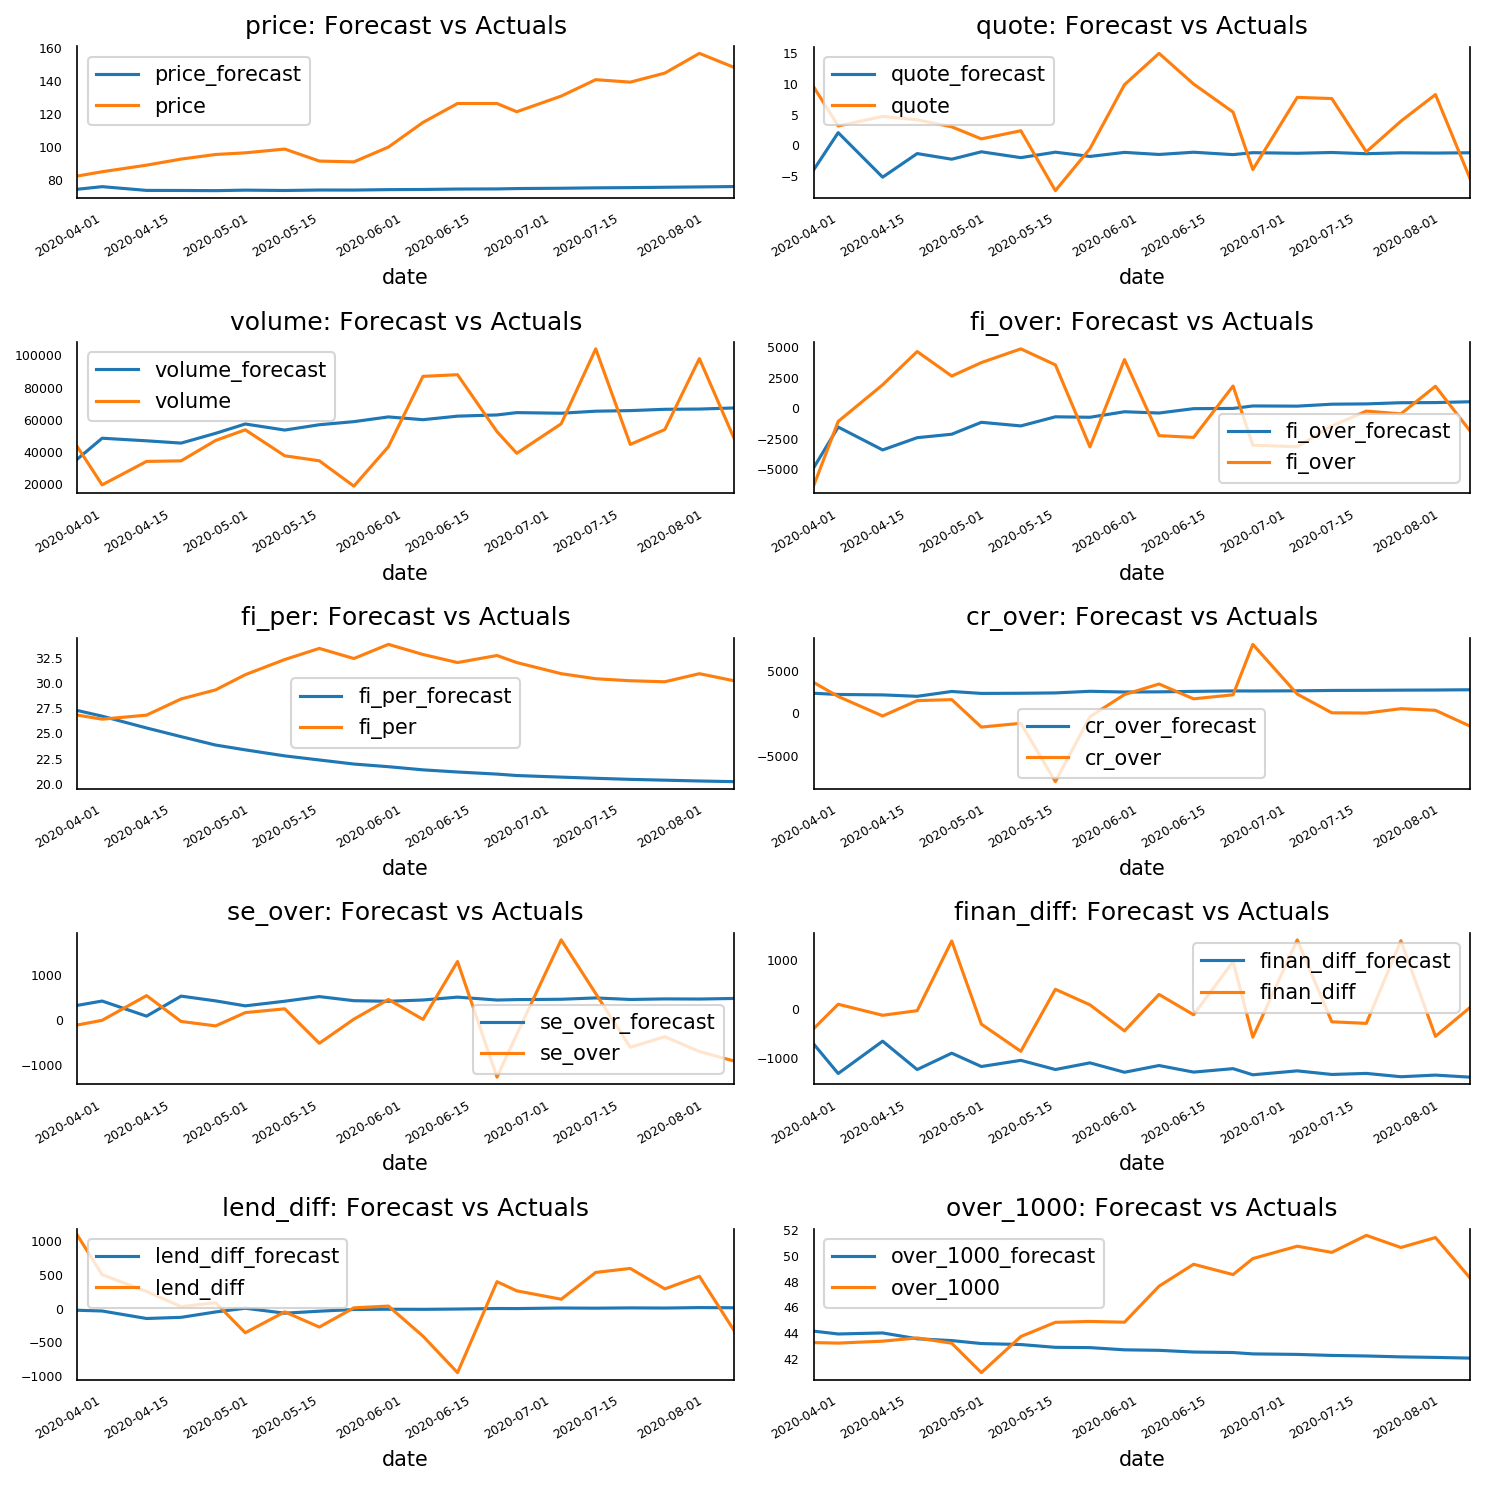

In [252]:
fig, axes= plt.subplots(nrows=int(len(df1.columns)/2), ncols=2, dpi=150, figsize=(10, 10))
for i, (col, ax) in enumerate(zip(df1.columns, axes.flatten())):
    df_result[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x', tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col+ ': Forecast vs Actuals')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();